In [1]:
%run nbinit.ipy

... Configuring matplotlib formats
... Configuring matplotlib with inline figures
... Importing numpy as np, scipy as sp, pyplot as plt, scipy.stats as stats
   ... scipy.signal as sig
... Importing widgets, display, HTML, Image, Javascript
... Some LaTeX definitions


... Defining figures captions 


... Loading customized Javascript for interactive solutions (show/hide)
... Redefining interactive from ipywidgets
... Redefining capture for ipywidgets < 7


# The continuous time case


* [The continuous time case](#The-continuous-time-case)
	* [The continuous time Fourier transform](#The-continuous-time-Fourier-transform)
		* [Definition](#Definition)
		* [Example -  The Fourier transform of a rectangular pulse](#Example----The-Fourier-transform-of-a-rectangular-pulse)
		* [Table of Fourier transform properties](#Table-of-Fourier-transform-properties)
		* [Symmetries of the Fourier transform. ](#Symmetries-of-the-Fourier-transform.)
	* [Dirac impulse, representation formula and convolution](#Dirac-impulse,-representation-formula-and-convolution)


## The continuous time Fourier transform

### Definition

We saw above that any discrete sequence can be expressed exactly as an infinite sum of complex exponentials. The same kind of result exist for continuous time signals. Any 
$x(t)$ can be expressed as the Fourier integral
\[
x(t) = \TFI{X(f)}{f}{t},
\]
where
\[
X(f) = \TF{x(t)}{t}{f}.
\]

The Fourier transform exists if the three sufficient conditions of Dirichlet are verified:
\begin{enumerate}
\item $x(t)$ possesses a finite number of discontinuities on any finite interval,
\item $x(t)$ possesses a finite number of maxima and minima on any finite interval,
\item $x(t)$ is absolutely integrable, that is 
\[
\int_{-\infty}^{+\infty} |x(t)| ~\dr{t} < +\infty.
\]
Indeed, if $x(t)$ is absolutely integrable, then
\[
\int_{-\infty}^{+\infty} |x(t)~e^{-j2\pi ft}| ~\dr{t} < \int_{-\infty}^{+\infty} 
|x(t)| ~\dr{t} < +\infty
\]
(since $|x(t)~e^{j2\pi ft}| = |x(t)|~|e^{j2\pi ft}| < |x(t)|$).
\end{enumerate}


### Example -  The Fourier transform of a rectangular pulse

\begin{example} \underline{rectangular pulse.}
We denote $\rect_T{(t)}$ the rectangular pulse defined by

\[
\rect_T(t) = 
\begin{cases}
1 & \text{if } t \in [-T/2,T/2], \\
0 & \text{elsewhere.}
\end{cases}
\]

We look for the Fourier transform of  $x(t) = A \rect_T(t)$.
It is enough to write down the definition of the Fourier transform:
\[
X(f) = \tf{A \rect_T(t)} = A \int_{-T/2}^{T/2} e^{-j2\pi ft} \dr{t},
\]
that is
\[
X(f) = A \left[ \frac{e^{-j2\pi ft}}{-j 2 \pi f}
\right]_{-\frac{T}{2}}^{\frac{T}{2}}
=  A \frac{1}{j2 \pi f} \left[ e^{j\pi fT} - e^{-j\pi fT}\right]
\]
so that finally
\begin{equation}
\eqboxb{\displaystyle{X(f) = AT \frac{\sin(\pi f T)}{\pi f T} \egalpardef AT 
\sinc{\pi f T}.}} 
\label{eq:tf-rect}
\end{equation}
where $\sinc{.}$ is called a `cardinal sinus`. We note that this Fourier tyransform is peal and even. We will see later that this property is true for the Fourier transforms of all real and even signals. The function $\sinc{\pi f T}$ vanishes for  $\pi  f T = k \pi$, that is for $f = k/T$; except for $k=0$, since $\sinc{x} = 1$ for $x \rightarrow 0$.
\end{example}

Let us look at this sinc function (you may play with several values of the width):

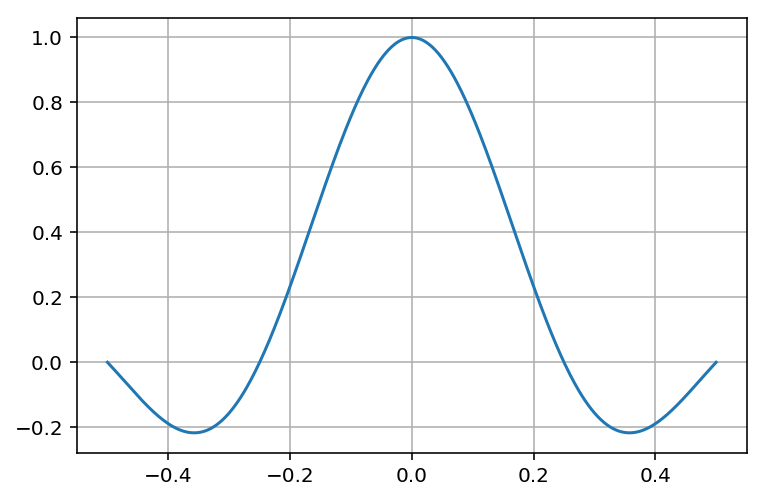

In [5]:
%matplotlib inline
def sinc(x):
    if isinstance(x,(int,float)): x=[x]
    x=np.array(x)
    out=np.ones(np.shape(x))
    I=np.where(x!=0)
    out[I]=np.sin(x[I])/x[I]
    return out

def dsinc(x,L):   # This is the "discrete time" cardinal sinus
    if isinstance(x,(int,float)): x=[x]
    x=np.array(x)
    out=np.ones(np.shape(x))
    I=np.where(x!=0)
    out[I]=np.sin(x[I])/(L*np.sin(x[I]/L))
    return out

N=1000
f=np.linspace(-0.5,0.5,400)
plt.plot(f,sinc(pi*4*f))
plt.grid(b=True)


Playing with values using a slider.

In [12]:
N=1000
f=np.linspace(-0.5,0.5,400)
out = widgets.Output()

#----- Callbacks des widgets -------------
@out.capture(clear_output=True, wait=True)
def pltsinc(value):
    #clear_output(wait=True)
    T = s.value
    plt.plot(f,sinc(pi*T*f))
    plt.grid(b=True)
    plt.show()
s=widgets.FloatSlider(min=0, max=20, step=0.1, value=8)
pltsinc('Width')
s.observe(pltsinc,'value')
display(widgets.VBox([s, out]))
#alternatively
#interact(pltsinc,value=fixed(1), T=[0.1,10,0.1])

\textbf{The integral of } $\sinc{\pi f T}$ -- Using the fact the [Dirichlet integral](http://en.wikipedia.org/wiki/Dirichlet_integral) is 
\[
\int_0^{+\infty} \sinc{x} \dr{x} = \frac{\pi}{2},
\]
the symmetry of $\sinc{}$, and a change of variable, we obtain that 
$$
\int_{-\infty} ^{+\infty} T \sinc{\pi f T} \dr{f} = 1.
$$


It is now useful to look at the limit cases. 
- First, let $T\to +\infty$, that is let the rectangular pulse tends to a constant value. Its Fourier transform,   $T\sinc{\pi f T}$ tends to a mass on zero, since all the zero crossings occurs at zero. Furthermore, the amplitude is proportionnal to $T$ and then goes to infinity. Hence, the Fourier transform of a constant is a mass with infinite amplitude, located at 0. As we noted above, the integral of $T \sinc{\pi f T}$ equals to 1, which implies that the integral of this mass at zero is 1. This Fourier transform is not a function in the classical sense, but a [distribution][1], see also the [Encyclopedia of mathematics](http://www.encyclopediaofmath.org/index.php/Generalized_function). In fact, it is the generalization of the Dirac $\delta$ function we had in discrete time.It is called \textem{Dirac distribution} (or function) and we end with the following pair

$$
1  \flecheTF \delta(f)
$$

- Second, consider a rectangular pulse with amplitude $1/T$ and width $T$. When  $T\to O$, this pulse tends to a Dirac distribution, a mass at zero, with infinite amplitude but also with a unit integral.  By the Fourier transform of a rectangular pulse (\ref{eq:tf-rect}), we obtain that the Fourier transform of a Dirac function is a unit constant

$$
\delta(t)  \flecheTF 1
$$



[1]: http://en.wikipedia.org/wiki/Distribution_(mathematics)

/usr/local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


0

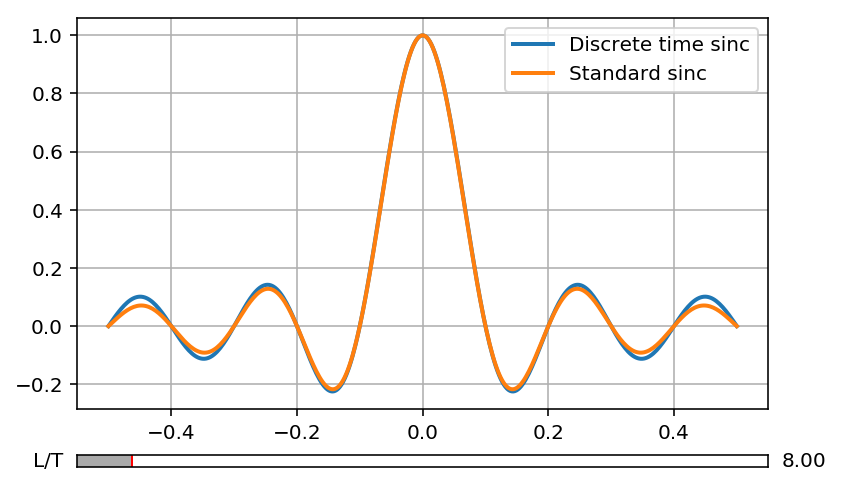

In [4]:
%matplotlib tk
from matplotlib.widgets import Slider

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2, left=0.1)

slider_ax = plt.axes([0.1, 0.1, 0.8, 0.02])
slider = Slider(slider_ax, "L/T", 0, 100, valinit=8, color='#AAAAAA')
L=10
f=np.linspace(-0.5,0.5,400)

line, = ax.plot(f,dsinc(pi*L*f,L), lw=2,label="Discrete time sinc")
line2, = ax.plot(f,sinc(pi*L*f), lw=2,label="Standard sinc")
#line2 is in order to compare with the "true" sinc
ax.grid(b='on')  
ax.legend()

def on_change(L):
    line.set_ydata(dsinc(pi*L*f,L))
    line2.set_ydata(sinc(pi*L*f))
        

slider.on_changed(on_change)

### Table of Fourier transform properties

This table is adapted and reworked from Dr Chris Jobling's [resources](http://cpjobling.github.io/EG-247-Resources/), see [this page](http://nbviewer.ipython.org/github/cpjobling/EG-247-Resources/blob/master/week7/ft1.ipynb). Many pages give tables and proofs of Fourier transform properties or Fourier pairs, e.g.: 
- [Properties of the Fourier Transform (Wikpedia)](http://en.wikipedia.org/wiki/Fourier_transform#Properties_of_the_Fourier_transform), 
- [thefouriertransform.com](http://www.thefouriertransform.com/pairs/fourier.php),  
- [Wikibooks: Engineering Tables/Fourier Transform Properties](http://en.wikibooks.org/wiki/Engineering_Tables/Fourier_Transform_Properties) 
- [Fourier Transfom&mdash;WolframMathworld](http://mathworld.wolfram.com/FourierTransform.html).

\[
\begin{array}{||l|l|l|l||}
\hline\hline 
    \hline
         &
        \text{Name} &
        x(t) &
        X(f) 
    \\
   \hline
        1 &
        \text{Linearity} &
        \sum_i a_ix_i(t)  &
        \sum_i a_iX_i(f) 
    \\
   \hline
        2 &
        \text{Duality} &
        x(-f) &
        X(t) 
    \\
   \hline
        3. &
        \text{Time and frequency scaling} &
        x(\alpha t) &
        \frac{1}{|\alpha|}S\left(\frac{ f}{\alpha}\right) 
     \\
   \hline
        4. &
        \text{Time shifting} &
        x(t-t_0) &
        e^{-j2\pi f t_0}X(f) 
    \\
   \hline
        5. &
        \text{Frequency shifting} &
        e^{j2\pi f_0 t}x(t) &
        X(f-f_0) 
    \\
   \hline
        7. &
        \text{Frequency differentiation} &
        (-jt)^k x(t) &
        \frac{d^k}{d f^k}X(f) 
    \\
   \hline
        8. &
        \text{Time integration} &
        \int_{-\infty}^{t}f(t) \dr{t} &
        \frac{X(f)}{j2\pi f}+ X(0)\delta(f) 
    \\
   \hline
        9. &
        \text{Conjugation} &
        s^*(t) &
        S^*(- f) 
    \\
   \hline
        10. &
        \text{Time convolution} &
        x_1(t)*x_2(t) &
        X_1(f) X_2(f) 
    \\
   \hline
        11. &
        \text{Frequency convolution} &
        x_1(t)x_2(t) &
         X_1(f)*X_2(f) 
    \\
   \hline
        12. &
        \text{Sum of x(t)} &
        \int_{-\infty}^{\infty} x(t) \dr{t} &
        X(0) 
    \\
   \hline
        13. &
        \text{Area under} X(f) &
        f(0)  &
        \int_{-\infty}^{\infty} X(f)\,df 
    \\
   \hline
        15. &
        \text{Parseval's theorem} &
        \int_{-\infty}^{\infty}|x(t)|^2 \dr{t} &
        \int_{-\infty}^{\infty}|X(f)|^2\,\dr{f}. 
    \\
   \hline
\hline\hline 
\end{array}
\]

\begin{prop} \label{prop:tf-retard}
This property enables to express the Fourier transform of a delayed signal as a function of the Fourier transform of the initial signal and a delay term:
\[
x(t-t_0) \flecheTF X(f)e^{-j2 \pi ft_0}.
\]
\end{prop}
\begin{proof}
This property can be obtained almost immediately from the definition of the Fourier transform:
\[
\tf{x(t-t_0)} = \TF{x(t-t_0)}{t}{f} ;
\]


Noting that $e^{-j2 \pi ft} = e^{-j2 \pi f(t-t_0)} e^{-j2 \pi ft_0}$, we obtain
\[
\tf{x(t-t_0)} = \int_{-\infty}^{+\infty}x(t-t_0) e^{-j2 \pi f(t-t_0)} e^{-j2 \pi 
ft_0} \dr{t}, 
\]
that is 
\[
\tf{x(t-t_0)} = e^{-j2 \pi ft_0} \int_{-\infty}^{+\infty}x(t-t_0) e^{-j2 \pi
f(t-t_0)} \dr{t} = e^{-j2 \pi ft_0} X(f).
\]
\end{proof}

### Symmetries of the Fourier transform. 

\[
\begin{array}{||l|l|l||}
\hline\hline 
    \hline
    \mathbf{\text{Time domain}} & \mathbf{\text{Frequency domain}} 
    \\
   \hline
      \text{real}
       &
      \text{hermitian}
\text{(real=even, imag=odd  modulus=even, phase=odd)}
    \\
   \hline
      \text{imaginary}
       &
      \text{anti-hermitian}
\text{(real=odd, imag=even  modulus=even, phase=odd)}
    \\
   \hline
      \text{even}
       &
      \text{even}
    \\
   \hline
      \text{odd}
       &
      \text{odd}
    \\
   \hline
      \text{real and even}
       &
      \text{real and even (i.e. cosine transform)}
    \\
   \hline
      \text{real and odd}        &
      \text{imaginary and odd (i.e. sine transform)}
    \\
   \hline
      \text{imaginary and even}
       &
      \text{imaginary and even}
    \\
   \hline
      \text{imaginary and odd}
       &
      \text{real and odd}
    \\
   \hline
\hline\hline 
\end{array}
\]


(table adapted from [cv.nrao.edu](http://www.cv.nrao.edu/course/astr534/FourierTransforms.html))

## Dirac impulse, representation formula and convolution

### Dirac impulse

Recall that the Dirac impulse $\delta(t)$ satisfies
\[
\delta(t) = \left\{\begin{array}{ll}
0 & \text{    if $t \not = 0$}, \\
+\infty & \text{    for $t = 0$}, 
\end{array}
\right.
\]
and is such that
\[
\int_{-\infty}^{+\infty} \delta(t) \dr{t} = 1.
\]
\index{Dirac impulse|Definition|fin}

### Representation formula

The Dirac impulse plays the role of an indicator function. In particular, we have 
$$
x(t) \delta(t-t_0)=x(t_0) \delta(t-t_0).
$$
Consequently, 
$$
\int_{-\infty}^{+\infty} x(t) \delta(t-t_0) \dr{t} = x(t_0) \int_{-\infty}^{+\infty}  \delta(t-t_0) \dr{t}=x(t_0).
$$
Therefore, we always have 

$$
\begin{cases}
x(t)  = { \int_{-\infty}^{+\infty} x(\tau) \delta(t-\tau) \dr{\tau} }\\
\text{with } {x(\tau)  = \int_{-\infty}^{+\infty} x(t) \delta(t-\tau) 
\dr{t}}.
\end{cases}
$$
This is nothing but the continuous-time version of the \textem{representation formula}. 

The set of distributions $\{\delta_\tau(t) : \delta(t-\tau)\}$, forms an orthonormal basis and  $x(\tau)$ can be viewed as a coordinate of $x(t)$ on this basis. Indeed, the scalar product between $x(t)$ and $\delta_\tau(t)$ is nothing but
\[
x(\tau) = < x(t),\delta_\tau(t) >= \int_{-\infty}^{+\infty} x(t) \delta(t-\tau) 
\dr{t},
\]
and $x(t)$ is then given as the sum of the basis functions, weighted by the associated coordinates: 
\[
x(t) = \int_{-\infty}^{+\infty} x(\tau) \delta(t-\tau) \dr{\tau}.
\]

Following the same approach as in the discrete case, we define the \textem{impulse response} $h(t)$ as the output of a linear invariant system to a Dirac impulse. By linearity, the output of the system to any input $x(t)$, expressed using the representation formula, is
\[
\fbox{$\displaystyle{y(t) = \int_{-\infty}^{+\infty} x(\tau)h(t-\tau) \dr{\tau} = 
[x*h](t).}$} 
\]
\index{Convolution!Definition|fin}
This is the time-continuous \textem{convolution} between $x$ and $h$, denoted $[x*h](t)$. It enables to express the output of the filter using only the input and the impulse response. This shows the importance of the impulse response as a description of the system. The other notions we studied in the discrete case, namely transfer function, Plancherel and Parseval theorems, etc,  extends straightforwardly to the continuous case. 


----
<div align=right> [Index](toc.ipynb) - [Back](BasicSystemsRepr.ipynb) - [Next](Periodization_discretization.ipynb)</div>